### The dataset

In [2]:
import opendatasets as od
import pandas as pd

In [3]:
od.download("https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset","../data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset-legit-dataset


100%|██████████| 15.6k/15.6k [00:00<?, ?B/s]

In [4]:
diabetes_dataset = pd.read_csv("../data/diabetes-prediction-dataset-legit-dataset/Dataset of Diabetes .csv")

### Exploring Dataset

In [5]:
diabetes_dataset.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [6]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [7]:
list_class = diabetes_dataset['CLASS'].unique()
list_gender = diabetes_dataset['Gender'].unique()
print(f'The dataset present some errors like diferents terms to same class.\nFor label CLASS: {list_class}\nFor label Gender: {list_gender}')

The dataset present some errors like diferents terms to same class.
For label CLASS: ['N' 'N ' 'P' 'Y' 'Y ']
For label Gender: ['F' 'M' 'f']


In [8]:
diabetes_dataset['CLASS'] = diabetes_dataset['CLASS'].apply(lambda x: str.upper(x).strip())
diabetes_dataset['Gender'] = diabetes_dataset['Gender'].apply(lambda x: str.upper(x))

In [9]:
list_class = diabetes_dataset['CLASS'].unique()
list_gender = diabetes_dataset['Gender'].unique()
print(f'The dataset present some errors like diferents terms to same class.\nFor label CLASS: {list_class}\nFor label Gender: {list_gender}')

The dataset present some errors like diferents terms to same class.
For label CLASS: ['N' 'P' 'Y']
For label Gender: ['F' 'M']


### Apply Categorical Encoding on 'Gender' column

In [10]:
diabetes_dataset = diabetes_dataset.drop(columns=['ID', 'No_Pation'])
df_diabetes = pd.get_dummies(diabetes_dataset, columns=['Gender'], dtype=int)
cols = [col for col in df_diabetes.columns if col != 'CLASS'] + ['CLASS']
df_diabetes = df_diabetes[cols]

In [11]:
df_diabetes.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_F,Gender_M,CLASS
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,N
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,1,N
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,N
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,N
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,1,N


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_diabetes['CLASS'] = le.fit_transform(df_diabetes['CLASS'])

In [13]:
df_diabetes.head(10)

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_F,Gender_M,CLASS
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0,1,0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,1,0,0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0,1,0
5,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,1,0,0
6,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,1,0,0
7,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0,1,0
8,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,0,1,0
9,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,1,0,0


In [14]:
results = df_diabetes['CLASS'].value_counts()
#results.index = le.inverse_transform(results.index)
results

CLASS
2    844
0    103
1     53
Name: count, dtype: int64

### Using K-Means

In [15]:
from sklearn.preprocessing import StandardScaler

X = df_diabetes.drop('CLASS', axis=1)
y_true = df_diabetes['CLASS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

kmeans.fit(X_scaled)

kmeans_labels = kmeans.labels_

ari = adjusted_rand_score(y_true, kmeans_labels)
nmi = normalized_mutual_info_score(y_true, kmeans_labels)
silhouette = silhouette_score(X_scaled, kmeans_labels)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")

Adjusted Rand Index (ARI): 0.223
Normalized Mutual Information (NMI): 0.328
Silhouette Score: 0.193


In [17]:
import pandas as pd

comparison_df = pd.crosstab(y_true, kmeans_labels)

comparison_df.index = le.inverse_transform(comparison_df.index)
comparison_df.rename_axis('Classe Real', axis='index', inplace=True)
comparison_df.rename_axis('Cluster K-Means', axis='columns', inplace=True)

print("Distribuição das Classes Reais dentro de cada Cluster do K-Means:")
display(comparison_df)

Distribuição das Classes Reais dentro de cada Cluster do K-Means:


Cluster K-Means,0,1,2
Classe Real,,,
N,2,1,100
P,3,0,50
Y,460,312,72


In [18]:
total_por_cluster = comparison_df.sum(axis=0)

percentage_df = comparison_df.div(total_por_cluster, axis=1) * 100

print("Composição Percentual de Cada Cluster K-Means:")
display(percentage_df.applymap('{:.2f}%'.format))

Composição Percentual de Cada Cluster K-Means:


C:\Users\ander\AppData\Local\Temp\ipykernel_6676\3311824148.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(percentage_df.applymap('{:.2f}%'.format))


Cluster K-Means,0,1,2
Classe Real,,,
N,0.43%,0.32%,45.05%
P,0.65%,0.00%,22.52%
Y,98.92%,99.68%,32.43%


In [19]:
# Célula 4 (Versão Melhorada): Comparando os clusters criados com as classes reais
import pandas as pd

# Criar a tabela de cruzamento
comparison_df = pd.crosstab(y_true, kmeans_labels)

# Traduzir o índice numérico (0, 1, 2) de volta para os rótulos originais (N, P, Y)
comparison_df.index = le.inverse_transform(comparison_df.index)

# Renomear os eixos para clareza máxima
comparison_df.rename_axis('Classe Real (A Verdade)', axis='index', inplace=True)
comparison_df.rename_axis('Grupo Criado (Cluster K-Means)', axis='columns', inplace=True)

print("""
COMO INTERPRETAR A TABELA ABAIXO:
- As LINHAS mostram a classificação real dos pacientes.
- As COLUNAS mostram em qual grupo o K-Means colocou cada paciente.
- Os NÚMEROS são a contagem de pacientes.
- O OBJETIVO é ver se cada 'Grupo Criado' contém majoritariamente pacientes de uma única 'Classe Real'.
""")

display(comparison_df)


COMO INTERPRETAR A TABELA ABAIXO:
- As LINHAS mostram a classificação real dos pacientes.
- As COLUNAS mostram em qual grupo o K-Means colocou cada paciente.
- Os NÚMEROS são a contagem de pacientes.
- O OBJETIVO é ver se cada 'Grupo Criado' contém majoritariamente pacientes de uma única 'Classe Real'.



Grupo Criado (Cluster K-Means),0,1,2
Classe Real (A Verdade),,,
N,2,1,100
P,3,0,50
Y,460,312,72


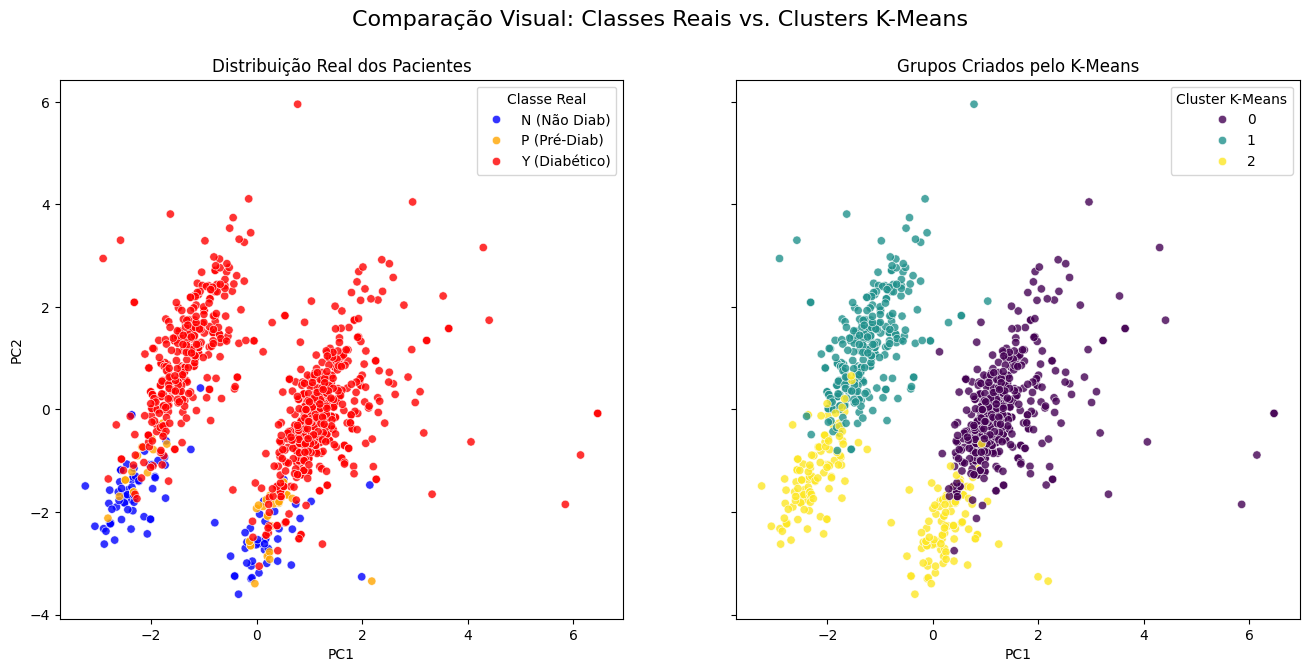

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

custom_palette = {
    'N (Não Diab)': 'blue',
    'P (Pré-Diab)': 'orange',
    'Y (Diabético)': 'red'
}

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Classe Real'] = y_true 
pca_df['Cluster K-Means'] = kmeans_labels

pca_df['Classe Real'] = pca_df['Classe Real'].map({0: 'N (Não Diab)', 1: 'P (Pré-Diab)', 2: 'Y (Diabético)'})

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True)
fig.suptitle('Comparação Visual: Classes Reais vs. Clusters K-Means', fontsize=16)

sns.scatterplot(ax=axes[0], data=pca_df, x='PC1', y='PC2', hue='Classe Real', palette=custom_palette, alpha=0.8)
axes[0].set_title('Distribuição Real dos Pacientes')

sns.scatterplot(ax=axes[1], data=pca_df, x='PC1', y='PC2', hue='Cluster K-Means', palette='viridis', alpha=0.8)
axes[1].set_title('Grupos Criados pelo K-Means')

plt.show()